In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
df_tow=pd.read_csv("./서울특별시_전동킥보드_견인_현황_20230831 (2).csv", encoding='cp949')
df_tow.shape

(123727, 6)

In [ ]:
unique_types=df_tow['유형'].unique()
print(unique_types)

['보도와 차도가 구분된 도로의 차도' '보도 중앙' '버스정류장, 택시 승강장' ...
 '[전화신고] [주민민원신고]동작구 상도로60길 38 그린빌라 벽쪽 주차공간에 현재 씽씽이 킥보드 4대 있음 즉시 수거바람'
 '구청 민원 미 조치\n와룡' '빨리 가져가세요']


In [ ]:
value_counts=df_tow['유형'].value_counts()
print(value_counts)

top_20_types=df_tow['유형'].value_counts().head(20)
print(top_20_types)

보도와 차도가 구분된 도로의 차도       58416
횡단보도, 산책로 등              17246
버스정류장, 택시 승강장            10086
보도 중앙                     9821
자전거 도로                    7166
                         ...  
차도전동킥보드불편신고                  1
횡단보도 주변 무단주차 다니기불편합니다        1
점자블록치워주세요                    1
공원관리자                        1
빨리 가져가세요                     1
Name: 유형, Length: 1469, dtype: int64
보도와 차도가 구분된 도로의 차도           58416
횡단보도, 산책로 등                  17246
버스정류장, 택시 승강장                10086
보도 중앙                         9821
자전거 도로                        7166
점자블록, 엘리베이터 입구                5530
지하철역 진출입로 및 주변                4177
기타                            4177
통행불편                           682
건물, 상가 보행자 진출입                 583
불편신고                           561
오신고                            265
차도                             201
횡단보도                           173
차도 사고위험                        167
차도 불법주차                        138
보행불편                           104
자전거도로                      

In [ ]:
retain_values=[
    '보도와 차도가 구분된 도로의 차도','횡단보도, 산책로 등','버스정류장, 택시승강장','보도 중앙','자전거 도로','점자블록, 엘리베이터 입구','지하철역 진출입로 및 주변','건물, 상가 보행자 진출입','차도','횡단보도','차도 사고위험','차도 불법주차','자전거도로']
df_tow=df_tow[df_tow['유형'].isin(retain_values)]
df_tow

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
6,7,2021-07-15,영등포구,서울특별시 영등포구 신길동 4209,"횡단보도, 산책로 등",2021-07-15
...,...,...,...,...,...,...
123657,123658,2023-08-31,송파구,서울특별시 송파구 문정동 641-1,자전거도로,2023-08-31
123671,123672,2023-08-31,중구,서울특별시 중구 신당동 432-1625,차도 불법주차,2023-08-31
123676,123677,2023-08-31,영등포구,서울특별시 영등포구 대림동 736-2,차도,2023-08-31
123693,123694,2023-08-31,중구,서울특별시 중구 남대문로4가 45-2,차도 불법주차,2023-08-31


**견인 위치 유형**

In [ ]:
unique_types=df_tow['유형'].unique()
print(unique_types)

['보도와 차도가 구분된 도로의 차도' '보도 중앙' '횡단보도, 산책로 등' '건물, 상가 보행자 진출입'
 '점자블록, 엘리베이터 입구' '자전거 도로' '지하철역 진출입로 및 주변' '차도 사고위험' '횡단보도' '차도'
 '차도 불법주차' '자전거도로']


In [ ]:
df_tow_type=df_tow
df_tow_type['유형']=df_tow_type['유형'].replace('자전거도로', '자전거 도로')
df_tow_type['유형']=df_tow_type['유형'].replace('차도 사고위험', '차도')
df_tow_type['유형']=df_tow_type['유형'].replace('차도 불법주차', '차도')
df_tow_type['유형']=df_tow_type['유형'].replace('횡단보도, 산책로 등', '횡단보도')
df_tow_type['유형']=df_tow_type['유형'].replace('점자블록, 엘리베이터 입구', '엘리베이터 입구')
df_tow_type['유형']=df_tow_type['유형'].replace('건물, 상가 보행자 진출입', '진출입로')
df_tow_type['유형']=df_tow_type['유형'].replace('지하철역 진출입로 및 주변', '진출입로')

df_tow_type=df_tow_type['유형'].value_counts().reset_index()
df_tow_type.columns=['유형', '횟수']

df_tow_type

,유형,횟수
0,보도와 차도가 구분된 도로의 차도,58416
1,횡단보도,17419
2,보도 중앙,9821
3,자전거 도로,7265
4,엘리베이터 입구,5530
5,진출입로,4760
6,차도,506


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

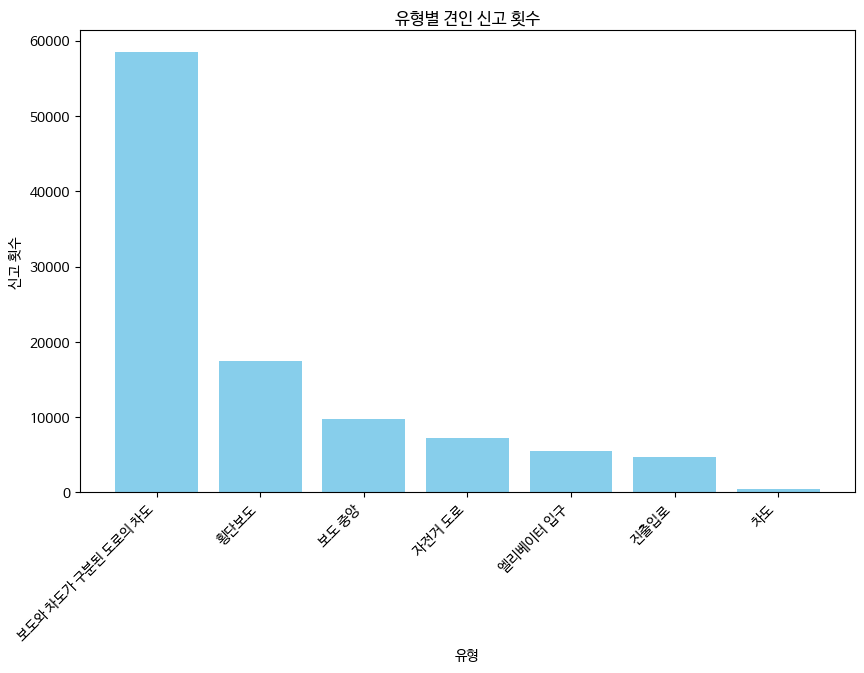

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_tow_type['유형'], df_tow_type['횟수'], color='skyblue')
plt.xlabel('유형')
plt.ylabel('신고 횟수')
plt.xticks(rotation=45, ha='right')
plt.title('유형별 견인 신고 횟수')
plt.show()

**견인 위치 표시하기**

In [ ]:
duplicated_addresses=df_tow['주소'].duplicated()
print(duplicated_addresses)

0         False
1         False
2         False
4         False
6         False
          ...  
123657     True
123671     True
123676     True
123693     True
123706     True
Name: 주소, Length: 103717, dtype: bool


In [ ]:
print(duplicated_addresses.sum())

77921


In [ ]:
df_tow_location=df_tow['주소'].value_counts().reset_index()
df_tow_location.columns=['주소', '횟수']

df_tow_location

,주소,횟수
0,서울특별시 마포구 동교동 192-44,762
1,서울특별시 마포구 서교동 415,678
2,서울특별시 서초구 서초동 1390,377
3,서울특별시 성동구 성수동2가 275-24,355
4,서울특별시 서초구 서초동 1327,329
...,...,...
25791,서울특별시 동작구 사당동 708-642,1
25792,서울특별시 강서구 내발산동 659-10,1
25793,서울특별시 서대문구 홍제동 287-226,1
25794,서울특별시 성동구 하왕십리동 1066-2,1


In [ ]:
df_tow_location['횟수']=df_tow_location['횟수'].astype(int)

In [ ]:
df_tow_location=df_tow_location[df_tow_location['횟수']>100]
df_tow_location

,주소,횟수
0,서울특별시 마포구 동교동 192-44,762
1,서울특별시 마포구 서교동 415,678
2,서울특별시 서초구 서초동 1390,377
3,서울특별시 성동구 성수동2가 275-24,355
4,서울특별시 서초구 서초동 1327,329
5,서울특별시 성동구 성수동2가 278-50,325
6,서울특별시 성동구 성수동2가 314-20,308
7,서울특별시 성동구 성수동2가 277-72,301
8,서울특별시 성동구 성수동2가 280-48,280
9,서울특별시 성동구 성수동1가 694-3,264


In [ ]:
address=df_tow_location['주소']
print(address.head())

0      서울특별시 마포구 동교동 192-44
1         서울특별시 마포구 서교동 415
2        서울특별시 서초구 서초동 1390
3    서울특별시 성동구 성수동2가 275-24
4        서울특별시 서초구 서초동 1327
Name: 주소, dtype: object


In [ ]:
for i in range(len(address)):
    a = address[i].split(' ')
    address[i] = " ".join(a[0:4])
print(address)

0        서울특별시 마포구 동교동 192-44
1           서울특별시 마포구 서교동 415
2          서울특별시 서초구 서초동 1390
3      서울특별시 성동구 성수동2가 275-24
4          서울특별시 서초구 서초동 1327
5      서울특별시 성동구 성수동2가 278-50
6      서울특별시 성동구 성수동2가 314-20
7      서울특별시 성동구 성수동2가 277-72
8      서울특별시 성동구 성수동2가 280-48
9       서울특별시 성동구 성수동1가 694-3
10      서울특별시 강남구 대치동 1011-12
11     서울특별시 성동구 성수동2가 289-32
12        서울특별시 마포구 동교동 192-6
13         서울특별시 서초구 서초동 1396
14       서울특별시 강남구 역삼동 801-35
15      서울특별시 동대문구 장안동 480-16
16        서울특별시 성동구 성수동2가 845
17         서울특별시 송파구 오금동 34-2
18          서울특별시 마포구 서교동 349
19          서울특별시 마포구 서교동 406
20        서울특별시 관악구 봉천동 979-7
21         서울특별시 강남구 대치동 1026
22          서울특별시 송파구 장지동 839
23      서울특별시 성동구 성수동2가 276-5
24     서울특별시 성동구 성수동2가 315-61
25       서울특별시 동대문구 휘경동 255-4
26     서울특별시 성동구 성수동2가 280-21
27        서울특별시 영등포구 여의도동 4-4
28      서울특별시 관악구 봉천동 100-358
29          서울특별시 영등포구 여의도동 3
30          서울특별시 강남구 역삼동 676
31          서울특별시 송파구 송파동 1-1
32        서울특별시 성동구 성수동2가 843
33    서울특별

<ipython-input-17-2edbd2da39d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address[i] = " ".join(a[0:4])


In [ ]:
pip install geopy

In [ ]:
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y
    except:
        return [0,0]

In [ ]:
latitude = []
longitude =[]

for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [ ]:
df_tow_location = pd.DataFrame({'주소': df_tow_location['주소'],'횟수':df_tow_location['횟수'], '위도':latitude,'경도':longitude})

df_tow_location.to_csv('전처리 견인 데이터셋 위경도.csv')

In [ ]:
df_tow_location

,주소,횟수,위도,경도
0,서울특별시 마포구 동교동 192-44,762,37.557142,126.926190
1,서울특별시 마포구 서교동 415,678,37.555071,126.923825
2,서울특별시 서초구 서초동 1390,377,37.488180,127.017510
3,서울특별시 성동구 성수동2가 275-24,355,37.540480,127.056010
4,서울특별시 서초구 서초동 1327,329,37.488180,127.017510
5,서울특별시 성동구 성수동2가 278-50,325,37.540480,127.056010
6,서울특별시 성동구 성수동2가 314-20,308,37.540480,127.056010
7,서울특별시 성동구 성수동2가 277-72,301,37.540480,127.056010
8,서울특별시 성동구 성수동2가 280-48,280,37.540480,127.056010
9,서울특별시 성동구 성수동1가 694-3,264,37.543500,127.037420


In [ ]:
df_tow_location = df_tow_location[(df_tow_location['위도'] != 0.000000) & (df_tow_location['경도'] != 0.000000)]
df_tow_location

,주소,횟수,위도,경도
0,서울특별시 마포구 동교동 192-44,762,37.557142,126.926190
1,서울특별시 마포구 서교동 415,678,37.555071,126.923825
2,서울특별시 서초구 서초동 1390,377,37.488180,127.017510
3,서울특별시 성동구 성수동2가 275-24,355,37.540480,127.056010
4,서울특별시 서초구 서초동 1327,329,37.488180,127.017510
5,서울특별시 성동구 성수동2가 278-50,325,37.540480,127.056010
6,서울특별시 성동구 성수동2가 314-20,308,37.540480,127.056010
7,서울특별시 성동구 성수동2가 277-72,301,37.540480,127.056010
8,서울특별시 성동구 성수동2가 280-48,280,37.540480,127.056010
9,서울특별시 성동구 성수동1가 694-3,264,37.543500,127.037420


In [ ]:
df_tow_location = df_tow_location.reset_index()
df_tow_location

,index,주소,횟수,위도,경도
0,0,서울특별시 마포구 동교동 192-44,762,37.557142,126.926190
1,1,서울특별시 마포구 서교동 415,678,37.555071,126.923825
2,2,서울특별시 서초구 서초동 1390,377,37.488180,127.017510
3,3,서울특별시 성동구 성수동2가 275-24,355,37.540480,127.056010
4,4,서울특별시 서초구 서초동 1327,329,37.488180,127.017510
5,5,서울특별시 성동구 성수동2가 278-50,325,37.540480,127.056010
6,6,서울특별시 성동구 성수동2가 314-20,308,37.540480,127.056010
7,7,서울특별시 성동구 성수동2가 277-72,301,37.540480,127.056010
8,8,서울특별시 성동구 성수동2가 280-48,280,37.540480,127.056010
9,9,서울특별시 성동구 성수동1가 694-3,264,37.543500,127.037420


In [ ]:
df_tow_location['경도'] = df_tow_location['경도'].astype(float)
df_tow_location['위도'] = df_tow_location['위도'].astype(float)

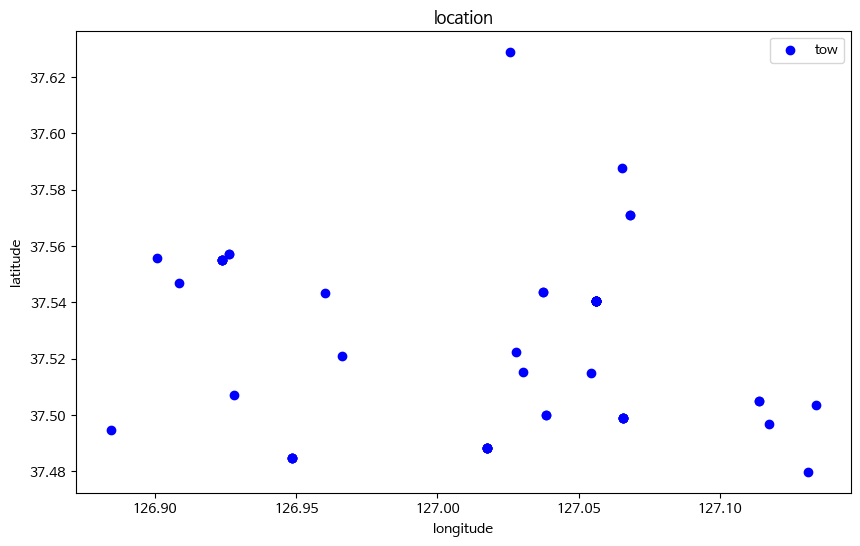

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tow_location['경도'], df_tow_location['위도'], marker='o', color='blue',  alpha=1, label='tow')
plt.title('location')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()

In [ ]:
import folium

m = folium.Map(location=[df_tow_location['위도'].iloc[0], df_tow_location['경도'].iloc[0]], zoom_start=11)

for _, row in df_tow_location.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=100,
        color='blue',
        fill=True,
        fill_color='cyan'
    ).add_to(m)

m

In [ ]:
df_subway=pd.read_csv("./서울시 지하철역 엘리베이터 위치정보.csv", encoding='euc-kr')
columns=['지하철역명', '노드 WKT']
df_subway=df_subway[columns].copy()
df_subway[['longitude', 'latitude']] = df_subway['노드 WKT'].str.extract(r'POINT\(([^ ]+) ([^ ]+)\)')
df_subway['longitude'] = df_subway['longitude'].astype(float)
df_subway['latitude'] = df_subway['latitude'].astype(float)

df_subway = df_subway[['지하철역명', 'longitude', 'latitude']]
df_subway.rename(columns={'longitude': '경도', 'latitude': '위도'}, inplace=True)

In [ ]:
df_bus=pd.read_csv("./서울시 버스정류소 위치정보.csv", encoding='euc-kr')
columns=['정류소명','X좌표','Y좌표']
df_bus=df_bus[columns].copy()
df_bus.rename(columns={'X좌표': '경도', 'Y좌표': '위도'}, inplace=True)

In [ ]:
df_subway

,지하철역명,경도,위도
0,동대문,127.010493,37.571418
1,동묘앞,127.017450,37.573297
2,창신,127.015515,37.579513
3,혜화,127.002252,37.581699
4,동대문,127.009040,37.570794
...,...,...,...
638,강일,127.176283,37.557405
639,둔촌오륜,127.138204,37.519775
640,굽은다리(강동구민회관앞),127.142837,37.545801
641,중앙보훈병원,127.147988,37.527855


In [ ]:
df_bus

,정류소명,경도,위도
0,종로2가사거리,126.987752,37.569808
1,창경궁.서울대학교병원,126.996522,37.579433
2,명륜3가.성대입구,126.998251,37.582581
3,종로2가.삼일교,126.987613,37.568579
4,혜화동로터리.여운형활동터,127.001744,37.586243
...,...,...,...
11285,우성아파트,127.139339,37.550386
11286,우성아파트,127.140046,37.550643
11287,조일약국,127.123596,37.533630
11288,성내시장,127.125497,37.536155


In [ ]:
df_tow_location

,index,주소,횟수,위도,경도
0,0,서울특별시 마포구 동교동 192-44,762,37.557142,126.926190
1,1,서울특별시 마포구 서교동 415,678,37.555071,126.923825
2,2,서울특별시 서초구 서초동 1390,377,37.488180,127.017510
3,3,서울특별시 성동구 성수동2가 275-24,355,37.540480,127.056010
4,4,서울특별시 서초구 서초동 1327,329,37.488180,127.017510
5,5,서울특별시 성동구 성수동2가 278-50,325,37.540480,127.056010
6,6,서울특별시 성동구 성수동2가 314-20,308,37.540480,127.056010
7,7,서울특별시 성동구 성수동2가 277-72,301,37.540480,127.056010
8,8,서울특별시 성동구 성수동2가 280-48,280,37.540480,127.056010
9,9,서울특별시 성동구 성수동1가 694-3,264,37.543500,127.037420


In [ ]:
from geopy.distance import great_circle

In [ ]:
def find_nearest_station(lat, lon, df_stations):
    min_distance = float('inf')
    nearest_station_name = None

    for _, row in df_stations.iterrows():
        station_lat_lon = (row['위도'], row['경도'])
        dist = great_circle((lat, lon), station_lat_lon).meters

        if dist < min_distance:
            min_distance = dist
            nearest_station_name = row['지하철역명'] if '지하철역명' in row else row['정류소명']

    return nearest_station_name, min_distance


In [ ]:
df_tow_location['가장 가까운 지하철역명'], df_tow_location['가장 가까운 지하철역과의 거리(m)'] = zip(*df_tow_location.apply(lambda x: find_nearest_station(x['위도'], x['경도'], df_subway), axis=1))
df_tow_location['가장 가까운 버스정거장명'], df_tow_location['가장 가까운 버스정거장과의 거리(m)'] = zip(*df_tow_location.apply(lambda x: find_nearest_station(x['위도'], x['경도'], df_bus), axis=1))

In [ ]:
df_tow_location

,index,주소,횟수,위도,경도,가장 가까운 지하철역명,가장 가까운 지하철역과의 거리(m),가장 가까운 버스정거장명,가장 가까운 버스정거장과의 거리(m)
0,0,서울특별시 마포구 동교동 192-44,762,37.557142,126.926190,홍대입구,88.392637,공항철도.홍대입구역,104.188919
1,1,서울특별시 마포구 서교동 415,678,37.555071,126.923825,홍대입구,129.308001,홍대입구역,133.020409
2,2,서울특별시 서초구 서초동 1390,377,37.488180,127.017510,남부터미널(예술의전당),396.739322,서울교대정문앞,121.597606
3,3,서울특별시 성동구 성수동2가 275-24,355,37.540480,127.056010,성수,470.146971,한라시그마밸리,97.189167
4,4,서울특별시 서초구 서초동 1327,329,37.488180,127.017510,남부터미널(예술의전당),396.739322,서울교대정문앞,121.597606
5,5,서울특별시 성동구 성수동2가 278-50,325,37.540480,127.056010,성수,470.146971,한라시그마밸리,97.189167
6,6,서울특별시 성동구 성수동2가 314-20,308,37.540480,127.056010,성수,470.146971,한라시그마밸리,97.189167
7,7,서울특별시 성동구 성수동2가 277-72,301,37.540480,127.056010,성수,470.146971,한라시그마밸리,97.189167
8,8,서울특별시 성동구 성수동2가 280-48,280,37.540480,127.056010,성수,470.146971,한라시그마밸리,97.189167
9,9,서울특별시 성동구 성수동1가 694-3,264,37.543500,127.037420,서울숲,618.226893,뚝섬서울숲,13.648906
